<a href="https://colab.research.google.com/github/ShaunakSen/Data-Science-and-Machine-Learning/blob/master/Applied_ML_CS_5785.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied ML - CS 5785

> GitHub: https://github.com/kuleshov/cornell-cs5785-applied-ml/tree/main/notebooks

> YouTube: https://www.youtube.com/playlist?list=PL2UML_KCiC0UlY7iCQDSiGDMovaupqc83

---




## Lecture 1. Part 2: Three Approaches to Machine Learning


### Supervised Learning Example

In [ ]:
# We will load the dataset from the sklearn ML library
from sklearn import datasets
boston = datasets.load_boston()

In [ ]:
print (boston.data.shape, boston.target.shape)

(506, 13) (506,)


We will visualize two variables in this dataset: house price and the education level in the neighborhood.



Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

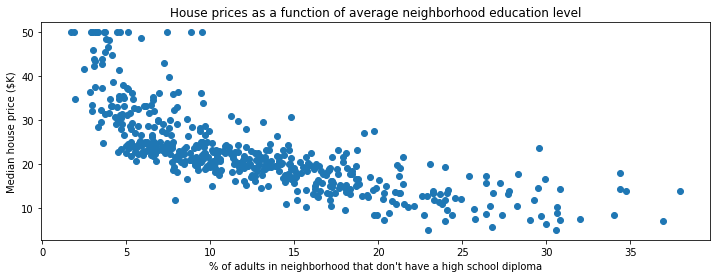

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter(boston.data[:,12], boston.target)
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in neighborhood that don't have a high school diploma")
plt.title("House prices as a function of average neighborhood education level")

We can use this dataset of examples to fit a supervised learning model.



In [ ]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge

In [ ]:
# Apply a supervised learning algorithm
model = KernelRidge(alpha=1, kernel='poly')
model.fit(boston.data[:,[12]], boston.target.flatten())

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='poly',
            kernel_params=None)

Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

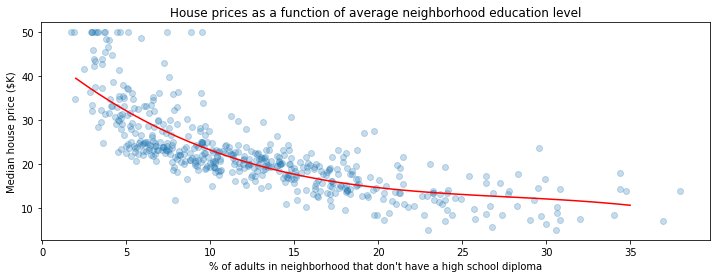

In [ ]:
predictions = model.predict(np.linspace(2, 35)[:, np.newaxis])

# Visualize the results
plt.scatter(boston.data[:,[12]], boston.target, alpha=0.25)
plt.plot(np.linspace(2, 35), predictions, c='red')
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in neighborhood that don't have a high school diploma")
plt.title("House prices as a function of average neighborhood education level")

### Unsupervised Learning Example

Text(0.5, 1.0, 'Dataset of Iris flowers')

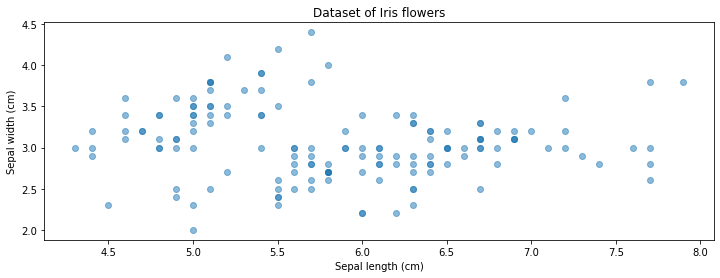

In [ ]:
# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

In [ ]:
# fit a Gaussian Mixture Model with three components
from sklearn import mixture

### n_componenets basically means we are trying to learn 3 clusters
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(iris.data[:,[0,1]])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

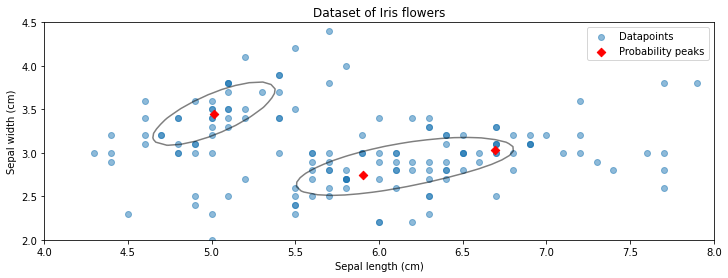

In [ ]:
# display learned probabilities as a contour plot
x, y = np.linspace(4.0, 8.0), np.linspace(2.0, 4.5)
X, Y = np.meshgrid(x, y)
Z = -model.score_samples(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(0, 10, 1), cmap="gray", alpha=0.5)
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(['Datapoints', 'Probability peaks'])

Here we have kind of identified 3 centroids for the clusters

We can now show the original labels

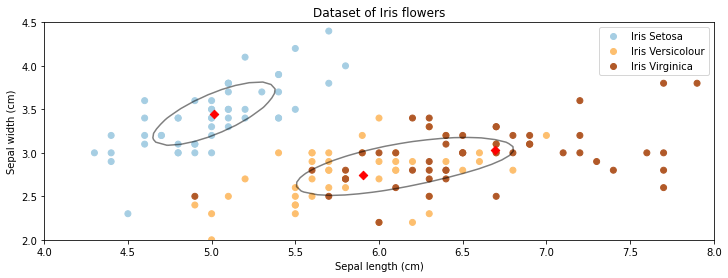

In [ ]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 30, 1), cmap='gray', alpha=0.5)
p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

As we can see the centroids did roughly corr to teh centers of the 3 classes

## Lecture 2 - Part 1: A Supervised Machine Learning Problem


Let's return to our example: predicting diabates risk. What would a dataset look like?

We will use the UCI Diabetes Dataset; it's a toy dataset that's often used to demonstrate machine learning algorithms.

- For each patient we have a access to a measurement of their body mass index (BMI) and a quantiative diabetes risk score (from 0-400).
- We are interested in understanding how BMI affects an individual's diabetes risk.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets


In [ ]:
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
diabetes_X, diabetes_y = diabetes_data['data'], diabetes_data['target']

print (diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


In [ ]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# Use only the BMI feature
diabetes_X  = diabetes_X[:, 2]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

In [ ]:
diabetes_X_train = diabetes_X[-20:]
diabetes_y_train = diabetes_y[-20:]

In [ ]:
pd.DataFrame(data={'bmi': diabetes_X_train, 'target': diabetes_y_train})

,bmi,target
0,27.335902,233.0
1,23.811456,91.0
2,25.331171,111.0
3,23.779122,152.0
4,23.973128,120.0
5,25.169499,67.0
6,27.659245,310.0
7,24.005462,94.0
8,23.294106,183.0
9,24.070131,66.0


Text(0, 0.5, 'Diabetes Risk')

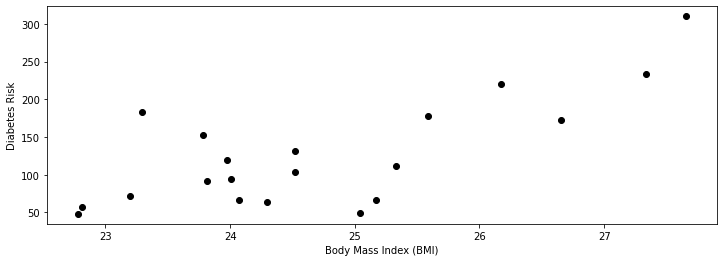

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

### A Supervised Learning Algorithm (Part 1)

What is the relationship between BMI and diabetes risk?

We could assume that risk is a linear function of BMI. In other words, for some unknown $\theta_0, \theta_1 \in \mathbb{R}$, we have
$$ y = \theta_1 \cdot x + \theta_0, $$
where $x$ is the BMI (also called the independent variable), and $y$ is the diabetes risk score (the dependent variable). 

Note that $\theta_1, \theta_0$ are the slope and the intercept of the line relates $x$ to $y$. We call them *parameters*.

We will see many algorithms for this task. For now, let's call the `sklearn.linear_model` library to find a $\theta_1, \theta_0$ that fit the data well.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train.reshape(-1, 1), diabetes_y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train.reshape(-1, 1))

In [ ]:
diabetes_y_train_pred

array([[224.70261326],
       [ 92.9629219 ],
       [149.76810992],
       [ 91.75430088],
       [ 99.00602701],
       [143.72500481],
       [236.78882348],
       [100.21464803],
       [ 73.62498556],
       [102.63189008],
       [199.32157181],
       [ 69.99912249],
       [138.89052073],
       [111.09223723],
       [ 54.28704921],
       [159.4370781 ],
       [119.55258438],
       [119.55258438],
       [181.19225649],
       [ 55.49567023]])

In [ ]:
# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

Slope (theta1): 	 [37.37884216]
Intercept (theta0): 	 [-797.08173903]


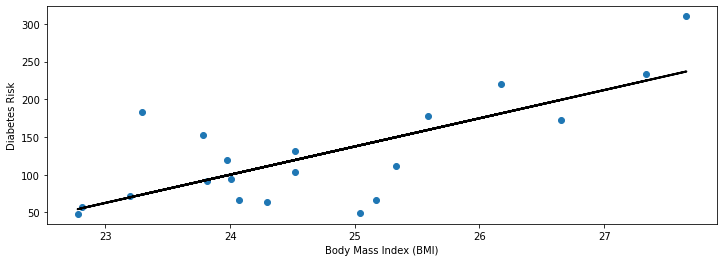

In [ ]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)

### Predictions Using Supervised Learning

Given a new dataset of patients with a known BMI, we can use this model to estimate their diabetes risk.


Let's start by loading more data. We will load three new patients (shown in red below) that we haven't seen before.

In [ ]:
# Collect 3 data points
diabetes_X_test = diabetes_X[:3]
diabetes_y_test = diabetes_y[:3]

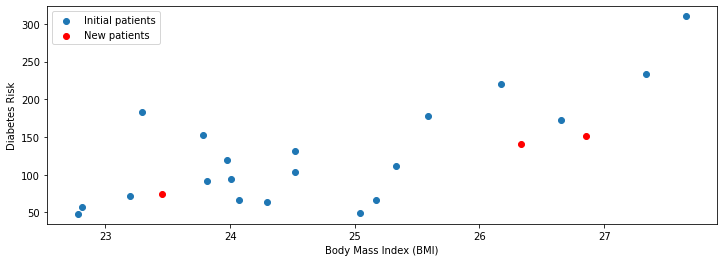

In [ ]:
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])

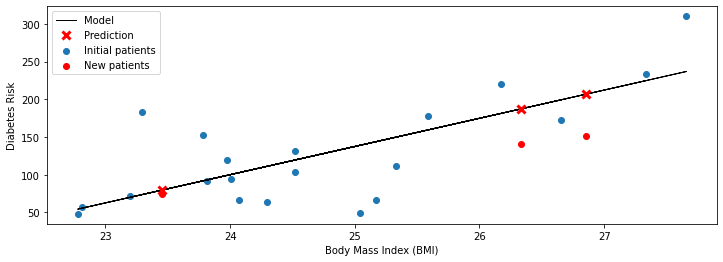

In [ ]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test.reshape(-1, 1))

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

## Lecture 2 - Part 2: Anatomy of Supervised Machine Learning: The Dataset

We say that a training dataset of size $n$ (e.g., $n$ patients) is a set
$$\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$$

Each $x^{(i)}$ denotes an input (e.g., the measurements for patient $i$), and each $y^{(i)} \in \mathcal{Y}$ is a target (e.g., the diabetes risk). 

Together, $(x^{(i)}, y^{(i)})$ form a *training example*.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
diabetes_X, diabetes_y = diabetes_data['data'], diabetes_data['target']

print (diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


In [ ]:
diabetes_X = pd.DataFrame(data=diabetes_X, columns=feature_names)

diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Training Dataset: Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1 \\
x^{(i)}_2 \\
\vdots \\
x^{(i)}_d
\end{bmatrix}$$
For example, it could be the measurements the values of the $d$ features for patient $i$.

The set $\mathcal{X}$ is called the feature space. Often, we have, $\mathcal{X} = \mathbb{R}^d$.

Let's look at data for one patient.

In [ ]:
diabetes_X.iloc[0]

age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019908
s6    -0.017646
Name: 0, dtype: float64

### Training Dataset: Attributes

We refer to the numerical variables describing the patient as *attributes*. Examples of attributes include:
* The age of a patient.
* The patient's gender.
* The patient's BMI.

Note that thes attributes in the above example have been mean-centered at zero and re-scaled to have a variance of one.

### Training Dataset: Features

Often, an input object has many attributes, and we want to use these attributes to define more complex descriptions of the input.

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these custom attributes *features*.

In [ ]:
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,False


### Features vs Attributes

In practice, the terms attribute and features are often used interchangeably. Most authors refer to $x^{(i)}$ as a vector of features (i.e., they've been precomputed). 

We will follow this convention and use attribute only when there is ambiguity between features and attributes.

### Features: Discrete vs. Continuous 

Features can be either discrete or continuous. We will see later that they may be handled differently by ML algorthims.

The BMI feature that we have seen earlier is an example of a continuous feature.

We can visualize its distribution.

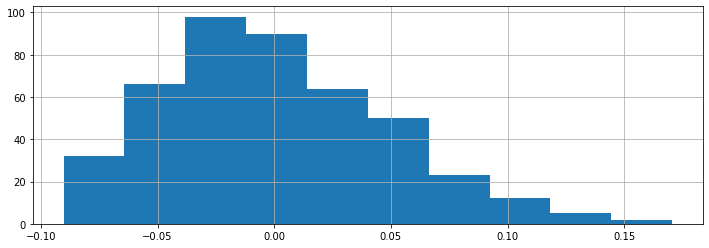

In [ ]:
diabetes_X.loc[:, 'bmi'].hist();

Other features take on one of a finite number of discrete values. The `sex` column is an example of a categorical feature.

In this example, the dataset has been pre-processed such that the two values happen to be `0.05068012` and `-0.04464164`.

[ 0.05068012 -0.04464164]


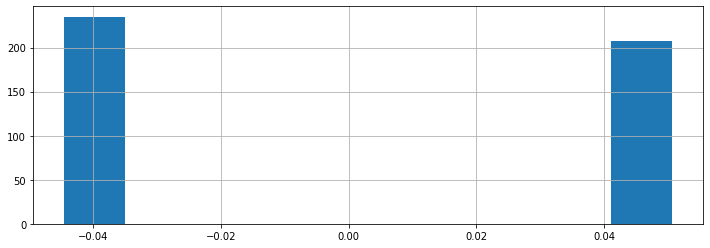

In [ ]:
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist();

### Training Dataset: Targets

For each patient, we are interested in predicting a quantity of interest, the *target*. In our example, this is the patient's diabetes risk.

Formally, when $(x^{(i)}, y^{(i)})$ form a *training example*, each $y^{(i)} \in \mathcal{Y}$ is a target. We call $\mathcal{Y}$ the target space.

In [ ]:
diabetes_y = pd.DataFrame(data=diabetes_y, columns=['Target'])

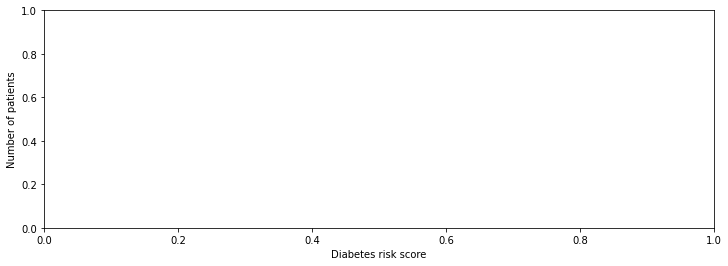

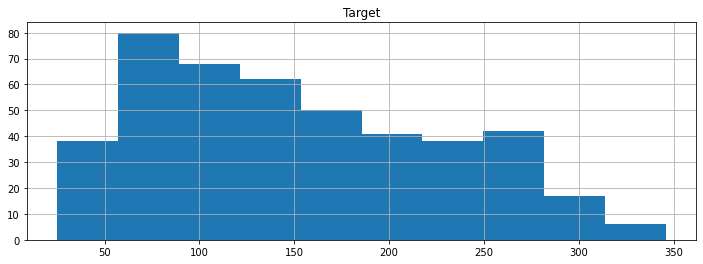

In [ ]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist();

### Targets: Regression vs. Classification

We distinguish between two broad types of supervised learning problems that differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous. We are fitting a curve in a high-dimensional feature space that approximates the shape of the dataset.
2. __Classification__: The target variable $y$ is discrete. Each discrete value corresponds to a *class* and we are looking for a hyperplane that separates the different classes.

We can easily turn our earlier regression example into classification by discretizing the diabetes risk scores into high or low.

- Remember the train data had only 20 samples : X had one feature: the BMI and y had the target risk score

In [ ]:
diabetes_y_train.shape

(20,)

In [ ]:
diabetes_y_train

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [ ]:
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])  ### < 150 -> 0 ; > 150 -> 1
diabetes_y_train_discr

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
diabetes_X_train  ### 20 samples of the BMI score

array([27.33590163, 23.81145615, 25.33117117, 23.77912179, 23.97312796,
       25.16949936, 27.65924525, 24.00546232, 23.29410635, 24.07013104,
       26.65688002, 23.19710327, 25.04016191, 24.29647158, 22.77675656,
       25.58984607, 24.52281212, 24.52281212, 26.17186459, 22.80909092])

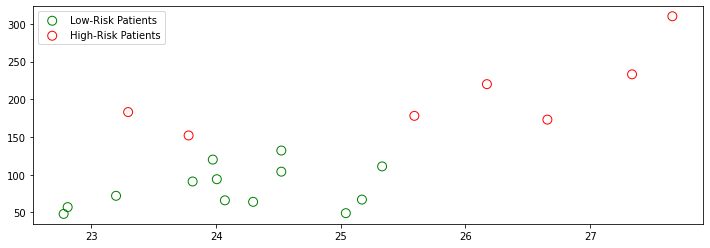

In [ ]:
# Visualize it

### X: BMI where the y value is == 0 | Y: y orig where y == 0
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
### X: BMI where the y value is == 1 | Y: y orig where y == 1
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.legend(['Low-Risk Patients', 'High-Risk Patients'])

Let's try to generate predictions for this dataset.

In [ ]:
# Create logistic regression object (note: this is actually a classification algorithm!)
clf = linear_model.LogisticRegression()

# Train the model using the training sets
clf.fit(diabetes_X_train.reshape(-1,1), diabetes_y_train_discr.reshape(-1,))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions on the training set
diabetes_y_train_pred = clf.predict(diabetes_X_train.reshape(-1,1))

diabetes_y_train_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

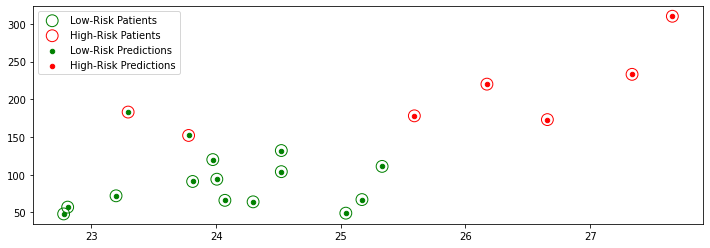

In [ ]:
# Visualize it

### X: BMI where original y == 0 | Y: orig y where orig y == 0
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=140, facecolors='none', edgecolors='g')
### X: BMI where original y == 1 | Y: orig y where orig y == 1
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=140, facecolors='none', edgecolors='r')
### X: BMI where pred y == 0 | Y: orig y where pred y == 0
plt.scatter(diabetes_X_train[diabetes_y_train_pred==0], diabetes_y_train[diabetes_y_train_pred==0], color='g', s=20)
### X: BMI where pred y == 1 | Y: orig y where pred y == 1
plt.scatter(diabetes_X_train[diabetes_y_train_pred==1], diabetes_y_train[diabetes_y_train_pred==1], color='r', s=20)
plt.legend(['Low-Risk Patients', 'High-Risk Patients', 'Low-Risk Predictions', 'High-Risk Predictions'])    

There are 2 patients where originally they are high risk but our model has predicted that they are low risk

## Lecture 2. Part 3: Anatomy of Supervised Learning: Learning Algorithms

We can also define the high-level structure of a supervised learning algorithm as consisting of three components:
* A __model class__: the set of possible models we consider.
* An __objective__ function, which defines how good a model is.
* An __optimizer__, which finds the best predictive model in the model class according to the objective function

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X, diabetes_y = diabetes.data, diabetes.target

feature_names = diabetes_data['feature_names']

In [ ]:
diabetes_X = pd.DataFrame(data=diabetes_X, columns=feature_names)

diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Model: Notation

We'll say that a model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Often, models have *parameters* $\theta \in \Theta$ living in a set $\Theta$. We will then write the model as
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
to denote that this model is parametrized by $\theta$.

### Model Class: Notation

This is basically a subset of all the functions that map X->Y

Formally, the model class is a set 
$$\mathcal{M} \subseteq \{f \mid f : \mathcal{X} \to \mathcal{Y} \}$$
of possible models that map input features to targets.

When the models $f_\theta$ are paremetrized by *parameters* $\theta \in \Theta$ living in some set $\Theta$. Thus we can also write
$$\mathcal{M} = \{f_\theta \mid f : \mathcal{X} \to \mathcal{Y}; \; \theta \in \Theta \}.$$

### Model Class: Example

One simple approach is to assume that $x$ and $y$ are related by a linear model of the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}

where $x$ is a featurized output and $y$ is the target.

The $\theta_j$ are the *parameters* of the model and is a scalar.


By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ y = \sum_{j=0}^d \beta_j \cdot x_j = \vec \beta \cdot \vec x. $$
where $\vec x$ is a vector of features and $\vec \beta$ is the vector of weights

### Objectives: Notation

Given a training set, how do we pick the parameters $\theta$ for the model? A natural approach is to select $\theta$ such that $f_\theta(x^{(i)})$ is close to $y^{(i)}$ on a training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

To capture this intuition, we define an *objective function* (also called a *loss function*) which is defined for the model class, it can range from 0 for a perfect model to very high values for a poor model

$$J(f) : \mathcal{M} \to [0, \infty), $$
which describes the extent to which $f$ "fits" the data $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

When $f$ is parametrized by $\theta \in \Theta$, the objective becomes a function $J(\theta) : \Theta \to [0, \infty).$


### Objective: Examples

What would are some possible objective functions? We will see many, but here are a few examples:
* Mean squared error: $$J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2$$
* Absolute (L1) error: $$J(\theta) = \frac{1}{n} \sum_{i=1}^n \left| f_\theta(x^{(i)}) - y^{(i)} \right|$$

These are defined for a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y1 = np.array([1, 2, 3, 4])
y2 = np.array([-1, 1, 3, 5])

print('Mean squared error: %.2f' % mean_squared_error(y1, y2))
print('Mean absolute error: %.2f' % mean_absolute_error(y1, y2))

Mean squared error: 1.50
Mean absolute error: 1.00


### Optimizer: Notation

At a high-level an optimizer takes an objective $J$ and a model class $\mathcal{M}$ and finds a model $f \in \mathcal{M}$ with the smallest value of the objective $J$.

\begin{align*}
\min_{f \in \mathcal{M}} J(f)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

When $f$ is parametrized by $\theta \in \Theta$, the optimizer minimizes a function $J(\theta)$ over all $\theta \in \Theta$.

### Optimizer: Example

We will see that behind the scenes, the `sklearn.linear_models.LinearRegression` algorithm optimizes the MSE loss.

\begin{align*}
\min_{\theta \in \mathbb{R}} \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{align*}

We can easily measure the quality of the fit on the training set and the test set.

Let's run the above algorithm on our diabetes dataset.

In [ ]:
diabetes_y = pd.DataFrame(data=diabetes_y, columns=['Target'])

In [ ]:
# Collect 20 data points for training
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

print (diabetes_X_train.shape, diabetes_y_train.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Collect 3 data points for testing
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

(20, 10) (20, 1)


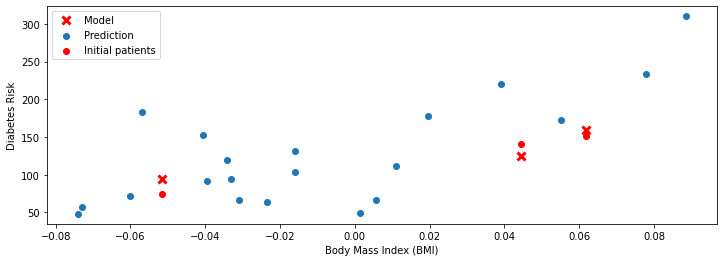

In [ ]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train)
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')
# plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

## Lecture 3. Part 1: Optimization and Calculus

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

In [ ]:
def quadratic_function(theta):
    """
    The cost function, J(theta).
    This is a 1D quad function
    """
    return 0.5*(2*theta-1)**2

Lets visualize this

In [ ]:
# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
thetas = np.linspace(-0.2,1,10)
f_vals = quadratic_function(thetas[:,np.newaxis])

[[0.98      ]
 [0.64222222]
 [0.37555556]
 [0.18      ]
 [0.05555556]
 [0.00222222]
 [0.02      ]
 [0.10888889]
 [0.26888889]
 [0.5       ]]


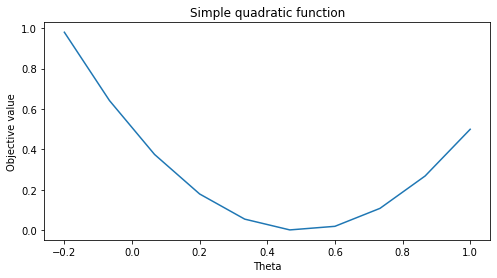

In [ ]:
# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.= quadratic_function(thetas[:,np.newaxis])

print (f_vals)

plt.plot(thetas, f_vals)
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function');

### Calculus Review: Derivatives

Recall that the derivative $$\frac{d f(\theta_0)}{d \theta}$$ of a __univariate function__ $f : \mathbb{R} \to \mathbb{R}$ is the instantaneous rate of change of the function $f(\theta)$ with respect to its parameter $\theta$ at the point $\theta_0$.

The derivative of `0.5*(2.theta -1)^2 is (2.theta -1)*2`

In [ ]:
def quadratic_derivative(theta):
    return (2*theta-1)*2

In [ ]:
df0 = quadratic_derivative(np.array([[0]])) # derivative at zero
f0 = quadratic_function(np.array([[0]]))

print (df0, f0)

[[-2]] [[0.5]]


Text(0.5, 1.0, 'Simple quadratic function')

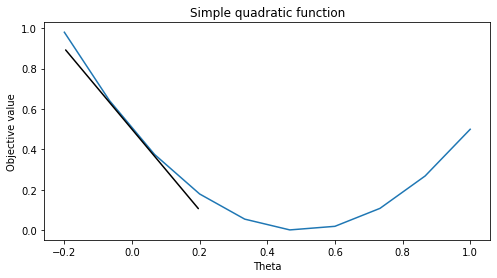

In [ ]:
line_length = 0.2

plt.plot(thetas, f_vals)
plt.annotate('', xytext=(0-line_length, f0-line_length*df0), xy=(0+line_length, f0+line_length*df0),
             arrowprops={'arrowstyle': '-', 'lw': 1.5}, va='center', ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

Text(0.5, 1.0, 'Simple quadratic function')

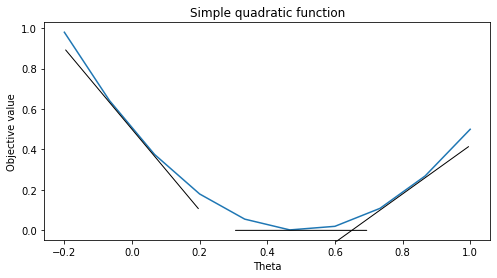

In [ ]:
pts = np.array([[0, 0.5, 0.8]]).reshape((3,1))
df0s = quadratic_derivative(pts)
f0s = quadratic_function(pts)

plt.plot(thetas, f_vals)
for pt, f0, df0 in zip(pts.flatten(), f0s.flatten(), df0s.flatten()): 
    plt.annotate('', xytext=(pt-line_length, f0-line_length*df0), xy=(pt+line_length, f0+line_length*df0),
             arrowprops={'arrowstyle': '-', 'lw': 1}, va='center', ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

### Calculus Review: Partial Derivatives

The partial derivative $$\frac{\partial f(\theta_0)}{\partial \theta_j}$$ of a multivariate function $f : \mathbb{R}^d \to \mathbb{R}$ is the derivative of $f$ with respect to $\theta_j$ while all othe other inputs $\theta_k$ for $k\neq j$ are fixed.

Say y = 2x1 + x2 (multivariate in x1 and x2)

Then the partial derivative of y wer x1 is 2 and y wrt x2 is 1






### Calculus Review: The Gradient

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta_0$ as

$$ \nabla_\theta f (\theta_0) = \begin{bmatrix}
\frac{\partial f(\theta_0)}{\partial \theta_1} \\
\frac{\partial f(\theta_0)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta_0)}{\partial \theta_d}
\end{bmatrix}.$$

The $j$-th entry of the vector $\nabla_\theta f (\theta_0)$ is the partial derivative $\frac{\partial f(\theta_0)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

For example:

https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient

![](https://i.imgur.com/pIs0pSk.png)

Note that the gradient is a vector with dimensionaliy the same as the no of components in the input function

To construct examples of the gradient we need a multi-dimensional function

Lets assume we have a function of 2 components theta0 and theta1 and that our function is quadriatic in nature

In [ ]:
def quadratic_function2d(theta0, theta1):
    """Quadratic objective function, J(theta0, theta1).
    
    The inputs theta0, theta1 are 2d arrays and we evaluate
    the objective at each value theta0[i,j], theta1[i,j].
    We implement it this way so it's easier to plot the
    level curves of the function in 2d.

    Parameters:
    theta0 (np.array): 2d array of first parameter theta0
    theta1 (np.array): 2d array of second parameter theta1
    
    Returns:
    fvals (np.array): 2d array of objective function values
        fvals is the same dimension as theta0 and theta1.
        fvals[i,j] is the value at theta0[i,j] and theta1[i,j].
    """
    theta0 = np.atleast_2d(np.asarray(theta0))
    theta1 = np.atleast_2d(np.asarray(theta1))
    return 0.5*((2*theta1-2)**2 + (theta0-3)**2)

In [ ]:
theta0_grid = np.linspace(-4,7,101)
theta1_grid = np.linspace(-1,4,101)

print (theta0_grid.shape, theta1_grid.shape)

(101,) (101,)


In [ ]:
theta_grid = theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis]
print (len(theta_grid))

2


In [ ]:
print (theta_grid[0].shape, theta_grid[1].shape)

(1, 101) (101, 1)


In [ ]:
print ('ips to function: ', theta0_grid[np.newaxis,:].shape, theta1_grid[:,np.newaxis].shape)

J_grid = quadratic_function2d(theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis])

J_grid.shape

ips to function:  (1, 101) (101, 1)


(101, 101)

In [ ]:
J_grid

array([[32.5    , 31.73605, 30.9842 , ..., 15.1442 , 15.56605, 16.     ],
       [32.105  , 31.34105, 30.5892 , ..., 14.7492 , 15.17105, 15.605  ],
       [31.72   , 30.95605, 30.2042 , ..., 14.3642 , 14.78605, 15.22   ],
       ...,
       [41.32   , 40.55605, 39.8042 , ..., 23.9642 , 24.38605, 24.82   ],
       [41.905  , 41.14105, 40.3892 , ..., 24.5492 , 24.97105, 25.405  ],
       [42.5    , 41.73605, 40.9842 , ..., 25.1442 , 25.56605, 26.     ]])

(101, 101) (101, 101)


(-4.0, 7.0, -1.0, 4.0)

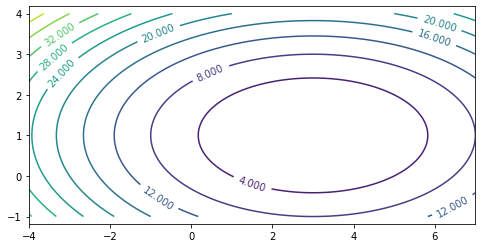

In [ ]:
X, Y = np.meshgrid(theta0_grid, theta1_grid)

print (X.shape, Y.shape)
contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.axis('equal')

Here what we have done is basically plotted values of theta0 and theta1 on X and Y axes

For each combo of theta0 and theta1 we can see the value of the function from the plot

These ellipses are called level curves; the function takes value 4 for example at all combos of theta0 and theta1 on the ellipse marked by 4

These are called __level curves__, analogous to what one might find on topological maps with hills and valleys. The map shows lines that on the map are at same altitude

We can view this plot the same way; the diff points corr to the altitude (value of the quad function)

The min of the function (the valley) is at the middle and as we expand more from the middle the function value becomes higher and higher



Let's write down the derivative of the quadratic function.

Worked out derivative:

![](https://i.imgur.com/VshNQKS.jpeg)

We can visualize the gradient

In [ ]:
def quadratic_derivative2d(theta0, theta1):
    """Derivative of quadratic objective function.
    
    The inputs theta0, theta1 are 1d arrays and we evaluate
    the derivative at each value theta0[i], theta1[i].

    Parameters:
    theta0 (np.array): 1d array of first parameter theta0
    theta1 (np.array): 1d array of second parameter theta1
    
    Returns:
    grads (np.array): 2d array of partial derivatives
        grads is of the same size as theta0 and theta1
        along first dimension and of size
        two along the second dimension.
        grads[i,j] is the j-th partial derivative 
        at input theta0[i], theta1[i].
    """
    # this is the gradient of 0.5*((2*theta1-2)**2 + (theta0-3)**2)
    grads = np.stack([theta0-3, (2*theta1-2)*2], axis=1)
    grads = grads.reshape([len(theta0), 2])
    return grads

(-4.0, 7.0, -1.0, 4.0)

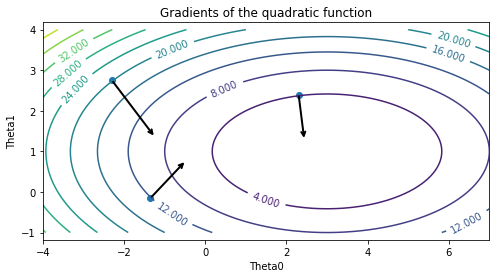

In [ ]:
theta0_pts, theta1_pts = np.array([2.3, -1.35, -2.3]), np.array([2.4, -0.15, 2.75])
dfs = quadratic_derivative2d(theta0_pts, theta1_pts)
line_length = 0.2

contours = plt.contour(X, Y, J_grid, 10)
for theta0_pt, theta1_pt, df0 in zip(theta0_pts, theta1_pts, dfs):
    plt.annotate('', xytext=(theta0_pt, theta1_pt), 
                     xy=(theta0_pt-line_length*df0[0], theta1_pt-line_length*df0[1]),
                     arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')
plt.scatter(theta0_pts, theta1_pts)
plt.clabel(contours)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Gradients of the quadratic function')
plt.axis('equal')

- the blue dots are the pts at which we are computing the gradients

- the arrows point to the -ve gradient direction (in the direction of minimizing the function)

- these arrows are pointing inwards closer to the min of the function

- we can show that these arrows point to the didrection in which function deceases most steeply at that point, where the slope of the valley decreases the fastest

- the arrows are always perpendicular to the level curve on which they sit, ie if we were to draw a tangent to the level curve that those pints, the arrow will be perpendicular to the tangent

### Gradient Descent: Intuition

Gradient descent is a very common optimization algorithm used in machine learning.

The intuition behind gradient descent is to repeatedly obtain the gradient to determine the direction in which the function decreases most steeply and take a step in that direction.

### Gradient Descent: Notation
More formally, if we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update until $\theta$ is no longer changing:

Here i stands for ith iteration. We do this until the theta values dont change too much

$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

As code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```
In the above algorithm, we stop when $||\theta_i - \theta_{i-1}||$ is small.

In [ ]:
2e-1

0.2

In [ ]:
convergence_threshold = 2e-1
step_size = 2e-1
theta, theta_prev = np.array([[-2], [3]]), np.array([[0], [0]])
opt_pts = [theta.flatten()]
opt_grads = []

while np.linalg.norm(theta - theta_prev) > convergence_threshold:
    # we repeat this while the value of the function is decreasing
    theta_prev = theta
    print ('Init theta:', theta)
    gradient = quadratic_derivative2d(*theta).reshape([2,1])
    print ('Gradient:', gradient)
    theta = theta_prev - step_size * gradient
    print ('New theta:', theta)
    ### add the new theta to the set of opt_pts to be plotted
    ### add the gradients to the set of opt_grads
    opt_pts += [theta.flatten()]
    opt_grads += [gradient.flatten()]

    break

Init theta: [[-2]
 [ 3]]
Gradient: [[-5]
 [ 8]]
New theta: [[-1. ]
 [ 1.4]]


Here we have dry run the first iteration of GD

1. theta_prev = thetea = [-2, 3]
2. grad = [theta_0 - 3, 2(2*theta_1 -2)] = [-5, 8]
3. theta = [-2, 3] - 0.2 * [-5, 8] = [-1, 1.4]


Now compute the full iteration:



In [ ]:
convergence_threshold = 2e-1
step_size = 2e-1
theta, theta_prev = np.array([[-2], [3]]), np.array([[0], [0]])
opt_pts = [theta.flatten()]
opt_grads = []

while np.linalg.norm(theta - theta_prev) > convergence_threshold:
    # we repeat this while the value of the function is decreasing
    theta_prev = theta
    # print ('Init theta:', theta)
    gradient = quadratic_derivative2d(*theta).reshape([2,1])
    # print ('Gradient:', gradient)
    theta = theta_prev - step_size * gradient
    # print ('New theta:', theta)
    ### add the new theta to the set of opt_pts to be plotted
    ### add the gradients to the set of opt_grads
    opt_pts += [theta.flatten()]
    opt_grads += [gradient.flatten()]



In [ ]:
opt_pts

[array([-2,  3]),
 array([-1. ,  1.4]),
 array([-0.2 ,  1.08]),
 array([0.44 , 1.016]),
 array([0.952 , 1.0032]),
 array([1.3616 , 1.00064]),
 array([1.68928 , 1.000128]),
 array([1.951424 , 1.0000256]),
 array([2.1611392 , 1.00000512]),
 array([2.32891136, 1.00000102])]

In [ ]:
theta

array([[2.32891136],
       [1.00000102]])

We have the path of opt_pts that leads from the init theta to the final theta that minimizes the function.

Also we have the grdaients at each pt which gives the direction towards the next theta

Using all this we can compute the trajectory

(-4.0, 7.0, -1.0, 4.0)

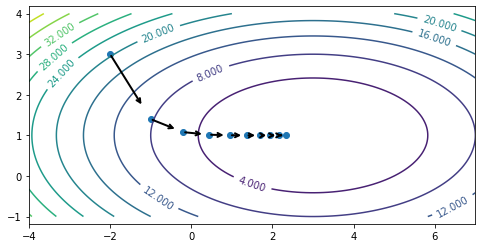

In [ ]:
opt_pts = np.array(opt_pts)
opt_grads = np.array(opt_grads)

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.scatter(opt_pts[:,0], opt_pts[:,1])

for opt_pt, opt_grad in zip(opt_pts, opt_grads):
    plt.annotate('', xytext=(opt_pt[0], opt_pt[1]), 
                 xy=(opt_pt[0]-0.8*step_size*opt_grad[0], opt_pt[1]-0.8*step_size*opt_grad[1]),
                 arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')

plt.axis('equal')

We can change the step_size to get different trajectories

## Lecture 3. Part 2: Gradient Descent

### Review: Gradient Descent

If we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

As code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```

- We start with some init guess of theta
- We compute the gradient of the loss wrt theta
- -ve grad points to the direction of steepest descent of J (where the function decreaseses most steeply)
- We update the current guess if theta by moving along this direction by a step size of alpha
- If the step size is chosen correctly, we will obtain a new estimate of where the min might be and the value of the function J at this new theta will be smaller than the previous iteration

### Review: Linear Model Family

Recall that a linear model has the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x \in \mathbb{R}^d$ is a vector of features and $y$ is the target. The $\theta_j$ are the *parameters* of the model.

By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ f_\theta(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

__Note: In python reading the docstring, X is given as a design matrix as shown below and we compute `X.theta`__

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
X, y = diabetes_data['data'], diabetes_data['target']

X = pd.DataFrame(data=X, columns=feature_names)
y = pd.DataFrame(data=y, columns=['Target'])

In [ ]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
y.head()

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
# add an extra column of onens
X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'one']]
y_train = y.iloc[-20:] / 300

In [ ]:
X_train.head()

,bmi,one
422,0.077863,1
423,-0.039618,1
424,0.011039,1
425,-0.040696,1
426,-0.034229,1


In [ ]:
y_train.head()

,Target
422,0.776667
423,0.303333
424,0.370000
425,0.506667
426,0.400000


In [ ]:
print (X_train.shape, y_train.shape)

(20, 2) (20, 1)


Text(0, 0.5, 'Diabetes Risk')

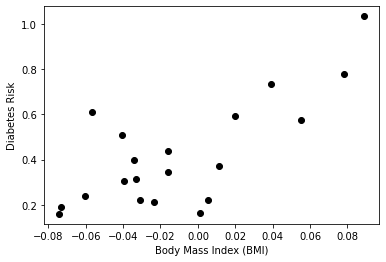

In [ ]:
plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

### Gradient Descent calculations walkthrough

![](https://i.imgur.com/UYDA2jS.jpeg)


In [ ]:
print(X_train.shape, y_train.shape)

(20, 2) (20, 1)


In [ ]:
### convert to numpy values

X_train_np, y_train_np  = X_train.values, y_train.values

### theta shape: (d+1)x1
theta = np.array([10,15]).reshape(2, 1)

print (X_train_np.shape, y_train_np.shape, theta.shape)
lr =0.005
opt_pts = [theta]
opt_grads = []

for epoch in range(500):
    ### X.theta - Y
    grad1 = X_train_np.dot(theta) - y_train_np
    ### X^T . (X.theta - Y)
    grad2 = X_train_np.T.dot(grad1)
    ### loss: scalar value
    loss = np.mean(0.5*grad1**2)
    if epoch%10 == 0:
        print ('loss', loss)

    ### update gradient
    # print (grad1.shape, grad2.shape)
    theta = theta - lr * grad2

    # print ('new theta:', theta)

    opt_pts += [theta]
    opt_grads += [grad2]

print (theta)

(20, 2) (20, 1) (2, 1)
loss 104.88217912539764
loss 12.79690388739772
loss 1.6038065881005223
loss 0.24312997315929516
loss 0.07758181884735096
loss 0.05730183831950425
loss 0.05467982519794825
loss 0.05420479430073616
loss 0.0539913872345936
loss 0.05381043647501316
loss 0.0536340840134667
loss 0.0534589409644769
loss 0.053284592668749055
loss 0.05311098599484264
loss 0.05293811176642325
loss 0.05276596616134148
loss 0.05259454601965431
loss 0.052423848273268424
loss 0.052253869876565585
loss 0.05208460779792266
loss 0.05191605901863335
loss 0.051748220532729684
loss 0.05158108934691371
loss 0.05141466248050176
loss 0.0512489369653714
loss 0.05108390984590836
loss 0.05091957817895384
loss 0.050755939033751994
loss 0.05059298949189776
loss 0.05043072664728465
loss 0.05026914760605301
loss 0.050108249486538484
loss 0.04994802941922042
loss 0.049788484546670946
loss 0.04962961202350379
loss 0.04947140901632362
loss 0.049313872703675585
loss 0.049157000275994886
loss 0.04900078893555673
l

In [ ]:
opt_pts[-1] ### the last stored theta

array([[9.50283491],
       [0.51561048]])

In [ ]:
x_line = np.stack([np.linspace(-0.1, 0.1, 10), np.ones(10,)])
x_line.shape

(2, 10)

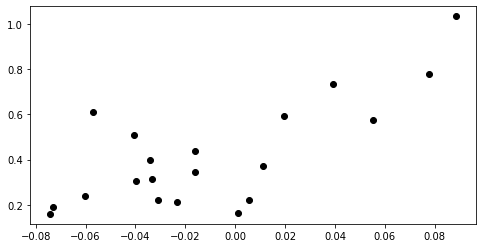

In [ ]:
plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')


In [ ]:
opt_pts[-1].flatten()

array([9.50283491, 0.51561048])

In [ ]:
x_values = np.linspace(-0.1, 0.1, 20)  ### dummy x values
x_values

w, b = opt_pts[-1].flatten()[0], opt_pts[-1].flatten()[1]  ### get the wt and bias, as we have appended the col of 1s to the right, first we have the wt and then the bias

print (w, b)

y_line = w*x_values + b ### get the values of y

print (y_line)

9.502834911076302 0.5156104790591307
[-0.43467301 -0.33464317 -0.23461333 -0.13458349 -0.03455365  0.06547619
  0.16550603  0.26553588  0.36556572  0.46559556  0.5656254   0.66565524
  0.76568508  0.86571492  0.96574476  1.06577461  1.16580445  1.26583429
  1.36586413  1.46589397]


### Plot the best fit line

Text(0, 0.5, 'Diabetes Risk')

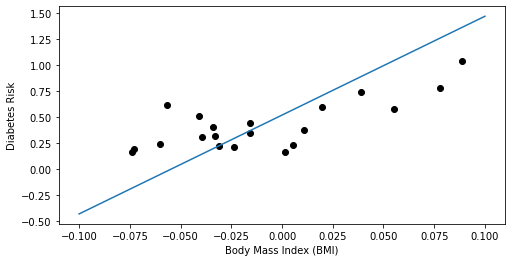

In [ ]:
plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.plot(x_values, y_line)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

## Lecture 3. Part 3: Ordinary Least Squares

In practice, there is a more effective way than gradient descent to find linear model parameters.

We will see this method here, which will lead to our first non-toy algorithm: Ordinary Least Squares.

### Notation: Design Matrix

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:
$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots \\
x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_d
\end{bmatrix}
=
\begin{bmatrix}
- & (x^{(1)})^\top & - \\
- & (x^{(2)})^\top & - \\
& \vdots & \\
- & (x^{(n)})^\top & - \\
\end{bmatrix}
.$$

![](https://i.imgur.com/k7K8tHX.jpg)


### MSE in iterative form and matrix-vector form

![](https://i.imgur.com/tWBWEjY.png)

#### Calculations walkthrough:

![](https://i.imgur.com/hNdNTlt.jpeg)

![](https://i.imgur.com/AFoIKC0.jpg)

We can see that both the iterative and matrix-vector form gives us same output 



### The Gradient of the Squared Error


![](https://i.imgur.com/rRlb2LZ.jpg)


Equating the gradient to 0 gives us:

![](https://i.imgur.com/NZXgl1g.jpg)

This theta* is the closed form solution



### Apply the method to the diabetes dataset

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
# Load the diabetes dataset
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
X, y = diabetes_data['data'], diabetes_data['target']

X = pd.DataFrame(data=X, columns=feature_names)
y = pd.DataFrame(data=y, columns=['Target'])

Text(0, 0.5, 'Diabetes Risk')

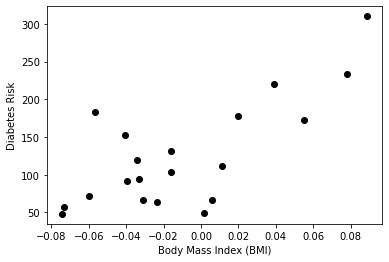

In [ ]:
# add an extra column of ones for the design matrix
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

In [ ]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,1
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,1
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,1
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,1
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,1


Applying the solution for theta:

$$ \theta^* = (X^\top X)^{-1} X^\top y.$$

In [ ]:
print (X_train.shape, y_train.shape)

print (X_train.T.dot(X_train).shape)

print (X_train.T.dot(X_train).dot(X_train.T).shape)

(20, 11) (20, 1)
(11, 11)
(11, 20)


In [ ]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) ### op shape should be 11x1 (dx1)

print (theta_best.shape)

(11, 1)


In [ ]:
theta_best

array([[-3.88886831e+00],
       [ 2.04648785e+02],
       [-6.42891630e+01],
       [-2.62796691e+02],
       [ 1.40037268e+04],
       [-1.17983078e+04],
       [-5.89215807e+03],
       [-1.13694765e+03],
       [-2.73659711e+03],
       [-3.93879743e+02],
       [ 1.55698998e+02]])

In [ ]:
theta_best_df = pd.DataFrame(data=theta_best.reshape(1, 11), columns=X.columns)
theta_best_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
0,-3.888868,204.648785,-64.289163,-262.796691,14003.726808,-11798.307781,-5892.15807,-1136.947646,-2736.597108,-393.879743,155.698998


We can now use our estimate of theta to compute predictions for 3 new data points.

In [ ]:
# Collect 3 data points for testing
X_test = X.iloc[:3]
y_test = y.iloc[:3]

print (X_test.shape, y_test.shape)

# generate predictions on the new patients
y_test_pred = X_test.dot(theta_best)  ### 3x11 . 11x1

print (y_test_pred.shape)

(3, 11) (3, 1)
(3, 1)


In [ ]:
y_test_pred

,0
0,158.881490
1,94.345405
2,125.215950


Let's visualize these predictions.

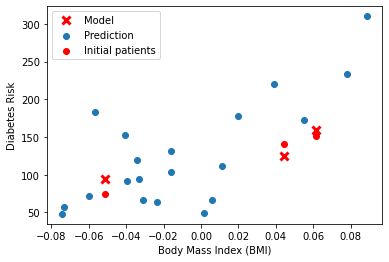

In [ ]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_train.loc[:, ['bmi']], y_train)
plt.scatter(X_test.loc[:, ['bmi']], y_test, color='red', marker='o')
plt.plot(X_test.loc[:, ['bmi']], y_test_pred.values, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

## Lecture 3. Part 4: Non-Linear Least Squares

So far, we have learned about a very simple linear model. These can capture only simple linear relationships in the data. How can we use what we learned so far to model more complex relationships?

We will now see a simple approach to model complex non-linear relationships called *least squares*.

![](https://i.imgur.com/G7eL3P0.png)



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.figure(figsize=(16,10))
x_vars = np.linspace(start=-2, stop=2, num=50)


<Figure size 1152x720 with 0 Axes>

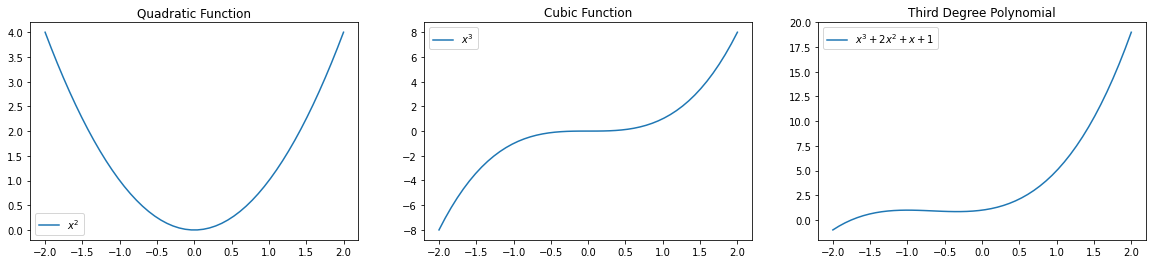

In [ ]:
plt.figure(figsize=(20,4))
x_vars = np.linspace(start=-2, stop=2, num=50)


plt.subplot('131') ### one row 3 cols first subplot
plt.title('Quadratic Function')
plt.plot(x_vars, x_vars**2)
plt.legend(["$x^2$"])

plt.subplot('132') ### 2nd subplot
plt.title('Cubic Function')
plt.plot(x_vars, x_vars**3)
plt.legend(["$x^3$"])

plt.subplot('133') ### 3rd subplot
plt.title('Third Degree Polynomial')
plt.plot(x_vars, x_vars**3 + 2*x_vars**2 + x_vars + 1)
plt.legend(["$x^3 + 2 x^2 + x + 1$"]);

### Modeling Non-Linear Relationships With Polynomial Regression


![](https://i.imgur.com/F83AwVC.jpeg)

![](https://i.imgur.com/VClZA9w.png)

![](https://i.imgur.com/zIgBoNN.jpeg)

![](https://i.imgur.com/CsvKFFI.jpeg)



### Applying this to the diabetes dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
# Load the diabetes dataset
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
X, y = diabetes_data['data'], diabetes_data['target']

X = pd.DataFrame(data=X, columns=feature_names)
y = pd.DataFrame(data=y, columns=['Target'])

Text(0, 0.5, 'Diabetes Risk')

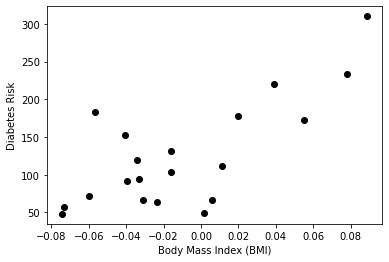

In [3]:
# add an extra column of ones for the design matrix
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

Lets create non-linear features for BMI

In [4]:
X_bmi = X_train.loc[:, ['bmi']]

X_bmi_p3 = pd.concat([X_bmi, X_bmi**2, X_bmi**3], axis=1)
X_bmi_p3.columns = ['bmi', 'bmi2', 'bmi3']
X_bmi_p3['one'] = 1
X_bmi_p3.head()

,bmi,bmi2,bmi3,one
422,0.077863,0.006063,0.000472,1
423,-0.039618,0.001570,-0.000062,1
424,0.011039,0.000122,0.000001,1
425,-0.040696,0.001656,-0.000067,1
426,-0.034229,0.001172,-0.000040,1


By training a linear model on this featurization of the diabetes set, we can obtain a polynomial model of diabetest risk as a function of BMI.

In [5]:
# Fit a linear regression
theta = np.linalg.inv(X_bmi_p3.T.dot(X_bmi_p3)).dot(X_bmi_p3.T).dot(y_train)

In [6]:
theta

array([[   511.91819916],
       [  8619.67564136],
       [111173.5282771 ],
       [   112.51883615]])

In [25]:
### create a set of 10 random BMI samples
x_line = np.linspace(-0.1, 0.1, 10)

### build features bmi^1, bm1^2, bmq^3, 1 and stack them, shape: 10, 4
x_line_p3 = np.stack([x_line, x_line**2, x_line**3, np.ones(10,)], axis=1)

### get the predictions y = X.theta

y_train_pred = x_line_p3.dot(theta)

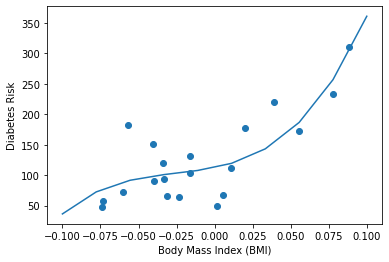

In [26]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_bmi, y_train)
plt.plot(x_line, y_train_pred)

### Multivariate Polynomial Regression

We can also take this approach to construct non-linear function of multiples variable by using multivariate polynomials.

For example, a polynomial of degree $2$ over two variables $x_1, x_2$ is a function of the form
<!-- $$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{22} x_1^2 x_2^2 + a_{21} x_1^2 x_2 + a_{12} x_1 x_2^2 + a_11 x_1 x_2 + a_{00}.
$$ -->
$$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{11} x_1 x_2 + a_{00}.
$$


In our two-dimensional example, this corresponds to a feature function $\phi : \mathbb{R}^2 \to \mathbb{R}^6$ of the form
$$ \phi(x) = \begin{bmatrix}
1 \\
x_1 \\
x_1^2 \\
x_2 \\
x_2^2 \\
x_1 x_2
\end{bmatrix}.
$$

The same approach holds for polynomials of an degree and any number of variables.

Any non-linear feature map $\phi(x) : \mathbb{R}^d \to \mathbb{R}^p$ can be used in this way to obtain general models of the form
$$ f_\theta(x) := \theta^\top \phi(x) $$
that are highly non-linear in $x$ but linear in $\theta$.

for example sine and cosine features also may be used

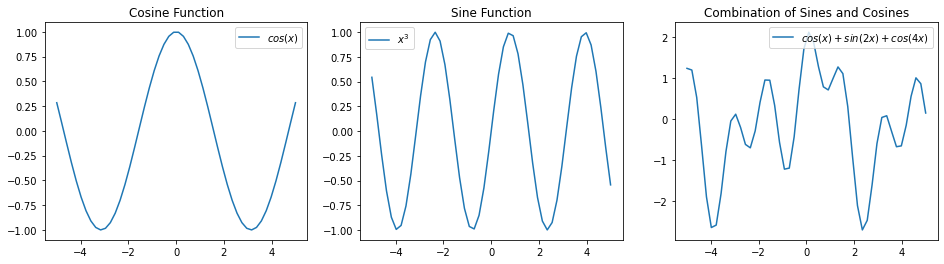

In [28]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-5, 5)

plt.subplot('131')
plt.title('Cosine Function')
plt.plot(x_vars, np.cos(x_vars))
plt.legend(["$cos(x)$"])

plt.subplot('132')
plt.title('Sine Function')
plt.plot(x_vars, np.sin(2*x_vars))
plt.legend(["$x^3$"])

plt.subplot('133')
plt.title('Combination of Sines and Cosines')
plt.plot(x_vars, np.cos(x_vars) + np.sin(2*x_vars) + np.cos(4*x_vars))
plt.legend(["$cos(x) + sin(2x) + cos(4x)$"]);

## Lecture 4. Part 1: The Data Distribution

### The Data Distribution

We will assume that the dataset is sampled from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$x, y \sim \mathbb{P}.$$

The training set $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$.

- identically distributed : Each training example is from the same distribution.
- independent: This distribution doesn't depend on previous training examples.

__Example__: Flipping a coin. Each flip has same probability of heads & tails and doesn't depend on previous flips.

__Counter-Example__: Yearly census data. The population in each year will be close to that of the previous year.

### Data Distribution: Example

Let's implement an example of a data distribution in numpy.

In [29]:
import numpy as np
np.random.seed(0)

def true_fn(X):
    """
    the data distribution method
    """
    return np.cos(1.5 * np.pi * X)

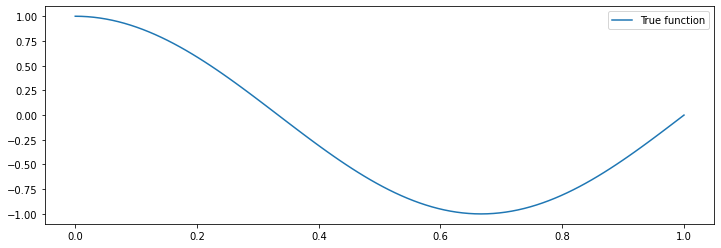

In [31]:
### visualize how our data distribution method looks

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

X_test = np.linspace(0, 1, 100) 
plt.plot(X_test, true_fn(X_test), label="True function")
plt.legend();

Let's now draw samples from the distribution. We will generate random $x$, and then generate random $y$ using
$$ y = f(x) + \epsilon $$
for a random noise variable $\epsilon$.

In [32]:
n_samples = 30

X = np.sort(np.random.rand(n_samples))

X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [34]:
y = true_fn(X) + np.random.randn(n_samples) * 0.1

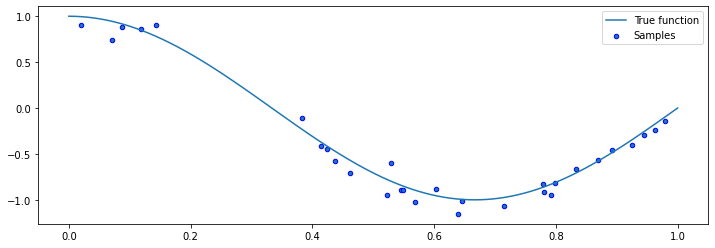

In [36]:
plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend();

The blue points are like a dataset we have generated from the data distribution defined above